In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/Pedestrian_Ramp_Complaints_20250321.csv')
print(df)

      CMT_Corner_ID                 Street_Name1     Street_Name2  \
0           1090385                     3 AVENUE   EAST 31 STREET   
1           1029246                    58 AVENUE        76 STREET   
2           1087607  FDR DRIVE EXIT 2 NORTHBOUND     DOVER STREET   
3           1126801                     AVENUE I   EAST 27 STREET   
4           1058658                    17 AVENUE       163 STREET   
...             ...                          ...              ...   
4578        1011966             DELAFIELD AVENUE  WEST 259 STREET   
4579        1053137                   143 STREET    ARCHER AVENUE   
4580        1118596              LEFFERTS AVENUE      TROY AVENUE   
4581        1155178                ARLENE STREET  SIDEVIEW AVENUE   
4582        1097826                  BANK STREET    HUDSON STREET   

            Borough  Community_District  Block  Lot     Complaint_ID  \
0         MANHATTAN                 106    912    1   1-1-1722172971   
1            QUEENS        

In [4]:
print(df.dtypes)

CMT_Corner_ID                 int64
Street_Name1                 object
Street_Name2                 object
Borough                      object
Community_District            int64
Block                         int64
Lot                           int64
Complaint_ID                 object
Complaint_Date               object
Temp_Repair_Feasible         object
Temp_Repair_Date             object
Temp_Repair_Type             object
Second_Temp_Repair_Needed    object
Date_Second_Temp_Repair      object
BulkComplaint                object
dtype: object


In [5]:
df.isnull().sum()

,0
CMT_Corner_ID,0
Street_Name1,0
Street_Name2,0
Borough,0
Community_District,0
Block,0
Lot,0
Complaint_ID,11
Complaint_Date,123
Temp_Repair_Feasible,124


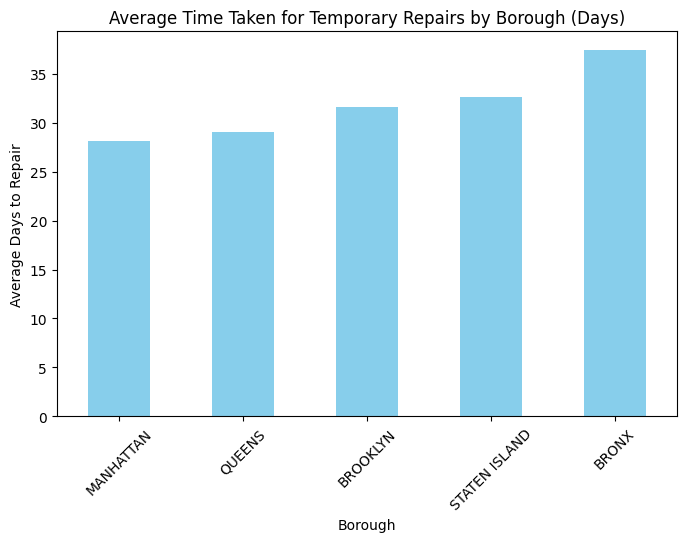

In [6]:
df['Complaint_Date'] = pd.to_datetime(df['Complaint_Date'])
df['Temp_Repair_Date'] = pd.to_datetime(df['Temp_Repair_Date'])
df['Repair_Time_Days'] = (df['Temp_Repair_Date'] - df['Complaint_Date']).dt.days
repair_time = df.groupby('Borough')['Repair_Time_Days'].mean().dropna()

plt.figure(figsize=(8, 5))
repair_time.sort_values().plot(kind='bar', color='skyblue')
plt.title('Average Time Taken for Temporary Repairs by Borough (Days)')
plt.xlabel('Borough')
plt.ylabel('Average Days to Repair')
plt.xticks(rotation=45)
plt.show()

In [7]:
df = df.drop(['Date_Second_Temp_Repair','Temp_Repair_Type', 'Temp_Repair_Date'], axis=1, errors='ignore')

In [8]:
print(df)

      CMT_Corner_ID                 Street_Name1     Street_Name2  \
0           1090385                     3 AVENUE   EAST 31 STREET   
1           1029246                    58 AVENUE        76 STREET   
2           1087607  FDR DRIVE EXIT 2 NORTHBOUND     DOVER STREET   
3           1126801                     AVENUE I   EAST 27 STREET   
4           1058658                    17 AVENUE       163 STREET   
...             ...                          ...              ...   
4578        1011966             DELAFIELD AVENUE  WEST 259 STREET   
4579        1053137                   143 STREET    ARCHER AVENUE   
4580        1118596              LEFFERTS AVENUE      TROY AVENUE   
4581        1155178                ARLENE STREET  SIDEVIEW AVENUE   
4582        1097826                  BANK STREET    HUDSON STREET   

            Borough  Community_District  Block  Lot     Complaint_ID  \
0         MANHATTAN                 106    912    1   1-1-1722172971   
1            QUEENS        

In [9]:
df.isnull().sum()

,0
CMT_Corner_ID,0
Street_Name1,0
Street_Name2,0
Borough,0
Community_District,0
Block,0
Lot,0
Complaint_ID,11
Complaint_Date,123
Temp_Repair_Feasible,124


In [10]:
df_clean = df.dropna()

In [11]:
df_clean.isnull().sum()

,0
CMT_Corner_ID,0
Street_Name1,0
Street_Name2,0
Borough,0
Community_District,0
Block,0
Lot,0
Complaint_ID,0
Complaint_Date,0
Temp_Repair_Feasible,0


In [ ]:
print(df_clean)

      CMT_Corner_ID       Street_Name1     Street_Name2        Borough  \
758         1151570  GREENCROFT AVENUE  REDGRAVE AVENUE  STATEN ISLAND   
759         1093677           5 AVENUE  WEST 136 STREET      MANHATTAN   
760         1106971       HICKS STREET    ORANGE STREET       BROOKLYN   
761         1108695           7 AVENUE   ST JOHNS PLACE       BROOKLYN   
762         1159481        NILES PLACE     SOREN STREET  STATEN ISLAND   
...             ...                ...              ...            ...   
4576        1077526          56 AVENUE       195 STREET         QUEENS   
4579        1053137         143 STREET    ARCHER AVENUE         QUEENS   
4580        1118596    LEFFERTS AVENUE      TROY AVENUE       BROOKLYN   
4581        1155178      ARLENE STREET  SIDEVIEW AVENUE  STATEN ISLAND   
4582        1097826        BANK STREET    HUDSON STREET      MANHATTAN   

      Community_District  Block  Lot     Complaint_ID Complaint_Date  \
758                  503   5106    1   

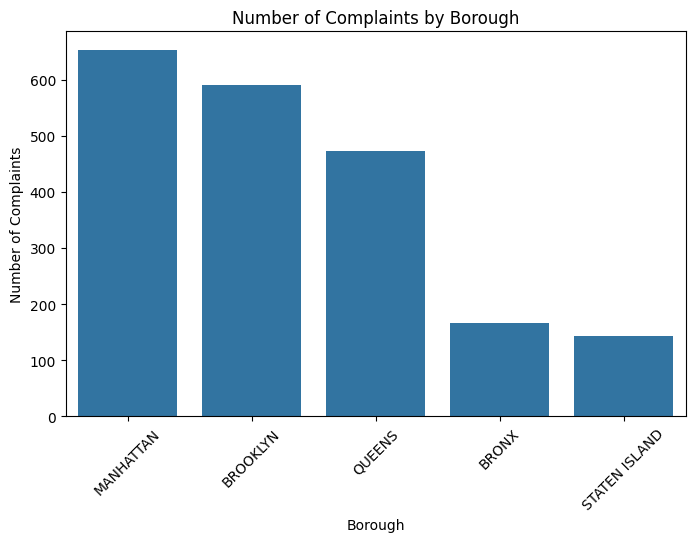

In [12]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Borough', data=df_clean, order=df_clean['Borough'].value_counts().index)
plt.title('Number of Complaints by Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45)
plt.show()

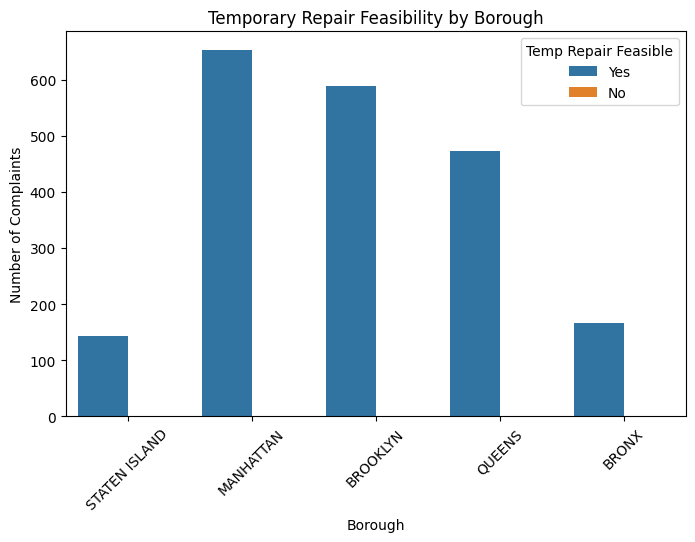

In [13]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Borough', hue='Temp_Repair_Feasible', data=df_clean)
plt.title('Temporary Repair Feasibility by Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Complaints')
plt.legend(title='Temp Repair Feasible', loc='upper right')
plt.xticks(rotation=45)
plt.show()

<ipython-input-14-bf31c30bf72f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Complaint_Date'] = pd.to_datetime(df_clean['Complaint_Date'])
<ipython-input-14-bf31c30bf72f>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_clean.set_index('Complaint_Date').resample('M').size().plot()


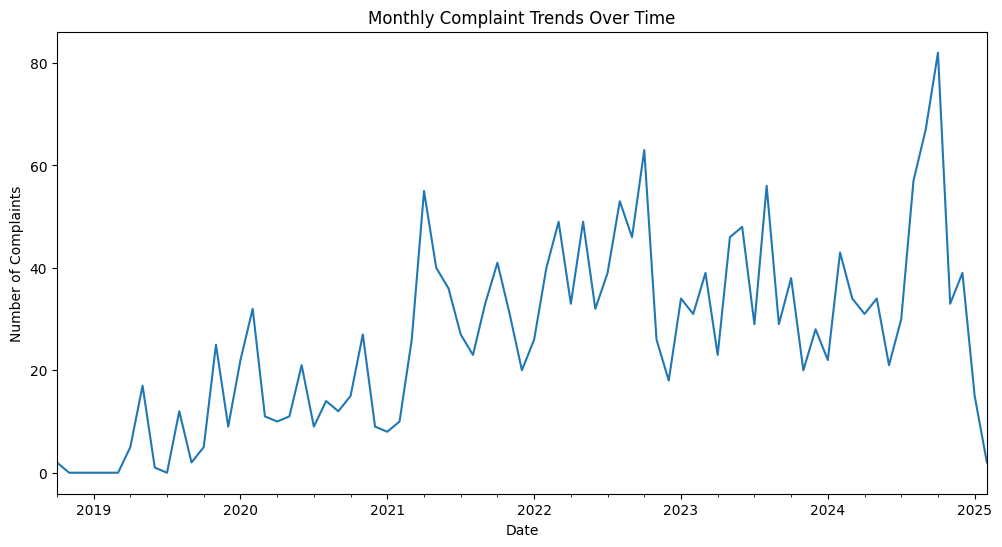

In [14]:
plt.figure(figsize=(12, 6))
# Convert 'Complaint_Date' to datetime before setting it as the index
df_clean['Complaint_Date'] = pd.to_datetime(df_clean['Complaint_Date'])
df_clean.set_index('Complaint_Date').resample('M').size().plot()
plt.title('Monthly Complaint Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Complaints')
plt.show()

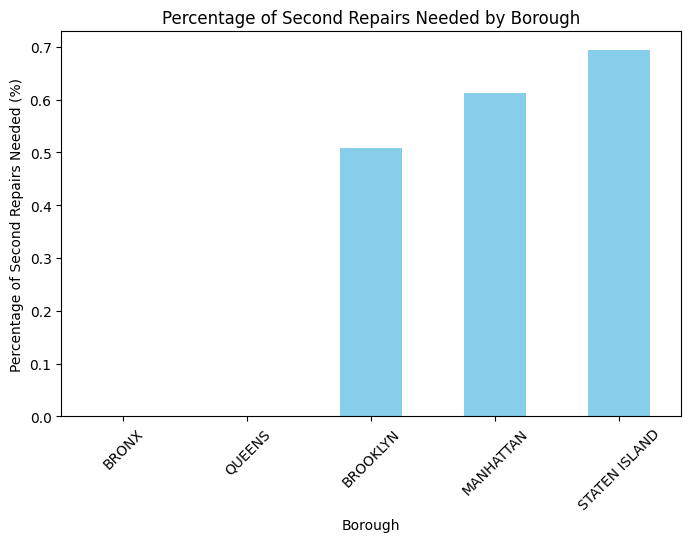

In [15]:
second_repair_rate = df_clean.groupby('Borough')['Second_Temp_Repair_Needed'].apply(lambda x: (x == 'Yes').mean() * 100)

plt.figure(figsize=(8, 5))
second_repair_rate.sort_values().plot(kind='bar', color='skyblue')
plt.title('Percentage of Second Repairs Needed by Borough')
plt.xlabel('Borough')
plt.ylabel('Percentage of Second Repairs Needed (%)')
plt.xticks(rotation=45)
plt.show()

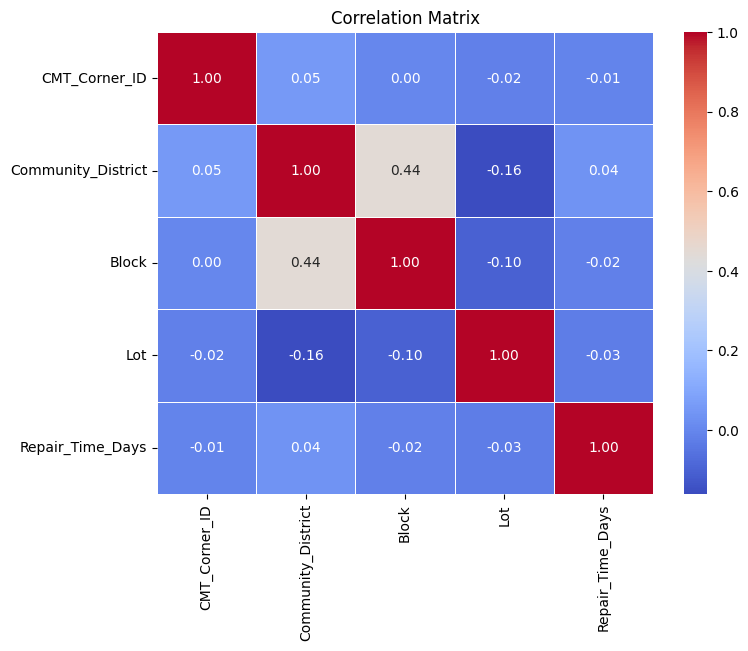

In [16]:
correlation_matrix = df_clean.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [17]:
# Feature engineering
df_clean['Neighborhood_Complaint_Volume'] = df_clean.groupby('Community_District')['Complaint_ID'].transform('count')
df_clean['BulkComplaint_Flag'] = df_clean['BulkComplaint'].map({'Yes': 1, 'No': 0})
df_clean['Temp_Repair_Feasible_Flag'] = df_clean['Temp_Repair_Feasible'].map({'Yes': 1, 'No': 0})

volume_min = df_clean['Neighborhood_Complaint_Volume'].min()
volume_max = df_clean['Neighborhood_Complaint_Volume'].max()
df_clean['Normalized_Volume'] = (df_clean['Neighborhood_Complaint_Volume'] - volume_min) / (volume_max - volume_min)

df_clean['Temp_Repair_Not_Feasible'] = 1 - df_clean['Temp_Repair_Feasible_Flag']
df_clean['Priority_Score'] = (
    2 * df_clean['BulkComplaint_Flag'] +
    2 * df_clean['Temp_Repair_Not_Feasible'] +
    df_clean['Normalized_Volume']
)




<ipython-input-17-c854884e0dfa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Neighborhood_Complaint_Volume'] = df_clean.groupby('Community_District')['Complaint_ID'].transform('count')
<ipython-input-17-c854884e0dfa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['BulkComplaint_Flag'] = df_clean['BulkComplaint'].map({'Yes': 1, 'No': 0})
<ipython-input-17-c854884e0dfa>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

In [18]:
# Step 3: Create binary target variable
threshold = df_clean['Priority_Score'].quantile(0.75)
df_clean['High_Priority'] = (df_clean['Priority_Score'] >= threshold).astype(int)



<ipython-input-18-281728b7345d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['High_Priority'] = (df_clean['Priority_Score'] >= threshold).astype(int)


In [19]:
# Step 4: Define features and target
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

features = ['BulkComplaint_Flag', 'Temp_Repair_Feasible_Flag', 'Neighborhood_Complaint_Volume']
X = df_clean[features]
y = df_clean['High_Priority']



In [20]:
# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [21]:
# Step 6: Train model
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)



DecisionTreeClassifier(max_depth=3, random_state=42)

In [22]:
# Step 7: Evaluate model
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))



[[442   0]
 [  0 166]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       442
           1       1.00      1.00      1.00       166

    accuracy                           1.00       608
   macro avg       1.00      1.00      1.00       608
weighted avg       1.00      1.00      1.00       608



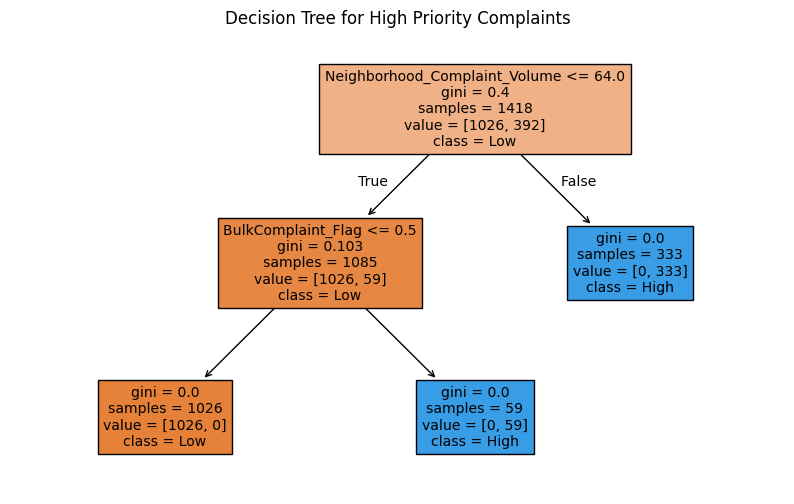

In [23]:
# Step 8: Visualize the tree
plt.figure(figsize=(10, 6))
plot_tree(clf, feature_names=features, class_names=['Low', 'High'], filled=True)
plt.title("Decision Tree for High Priority Complaints")
plt.show()

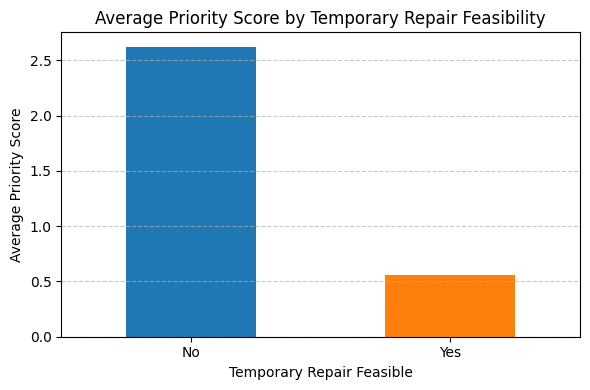

In [24]:


# Group by Temp_Repair_Feasible and get average Priority Score
avg_priority_by_feasibility = df_clean.groupby('Temp_Repair_Feasible')['Priority_Score'].mean()

# Plot the results
plt.figure(figsize=(6, 4))
avg_priority_by_feasibility.plot(kind='bar', color=['#1f77b4', '#ff7f0e'])
plt.title('Average Priority Score by Temporary Repair Feasibility')
plt.ylabel('Average Priority Score')
plt.xlabel('Temporary Repair Feasible')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

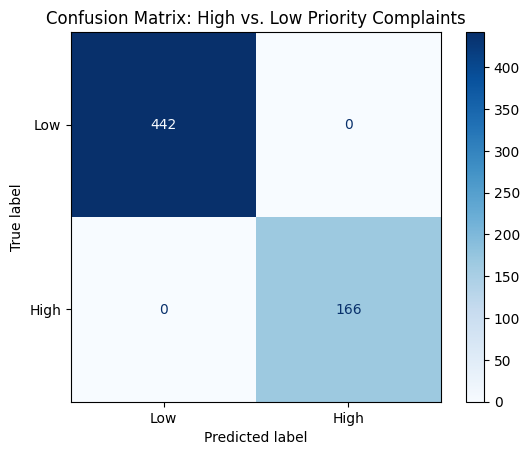

In [26]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # Import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming y_true and y_pred are your true and predicted labels
conf_matrix = confusion_matrix(y_test, y_pred)  # Calculate confusion matrix

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Low", "High"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix: High vs. Low Priority Complaints")
plt.grid(False)
plt.show()